In [28]:
# import pandas lib as pd
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib as mpl
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

mpl.style.use('ggplot') # optional: for ggplot-like style

>> Phase I: Identification and Categorization of Postal Services

>Algorithm for Preparing the Excel sheet for Data Wrangling
>1. Complete the missing information for main sections if possible.
2. In the original excel file, change the columns names, and remove empty rows and columns.
3. Add the name of the country in a new first column.
4. Create a function.
5. Create a dataframe for each one of the regions (excel file)
6. Read the sheets in the file one after another for each one of the regions, and save them in the created dataframe.


In [29]:
# read by default 1st sheet of an excel file
def retrieve_region_data(region_file):
    region_data = pd.ExcelFile(region_file)
    region_df = pd.concat([pd.read_excel(region_file, sheet_name = sheet) for sheet in region_data.sheet_names], 
                   ignore_index = False)
    
    return region_df

In [30]:
s1 = pd.Series(['a', 'b'])
s2 = pd.Series(['c', 'd'])
pd.concat([s1, s2], ignore_index = True)

0    a
1    b
2    c
3    d
dtype: object

In [68]:
# Create a dataframe object for the african data
africa_data = pd.DataFrame()
africa_data

""


In [69]:
# Retrieve a region Data
africa_data = retrieve_region_data('East_Africa.xlsx')
africa_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 139 entries, 0 to 19
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Region         139 non-null    object 
 1   Country        139 non-null    object 
 2   Serv_Name      139 non-null    object 
 3   Serv_Des       139 non-null    object 
 4   Cat            139 non-null    int64  
 5   Sub_Cat        139 non-null    float64
 6   Ben_Gov        122 non-null    object 
 7   Ben_Business   106 non-null    object 
 8   Ben_Citizen    121 non-null    object 
 9   Ben_Other      6 non-null      object 
 10  Ben_Specify    4 non-null      object 
 11  Ch_Office      134 non-null    object 
 12  Ch_Website     34 non-null     object 
 13  Ch_Mobile      46 non-null     object 
 14  Ch_Other       10 non-null     object 
 15  Ch_Specify     0 non-null      float64
 16  Fees_Provider  45 non-null     object 
 17  Fees_Ben       100 non-null    object 
 18  Fees_Other     4

In [70]:
# Add a new region data to the existing Africa Dataframe
africa_data = pd.concat([africa_data,retrieve_region_data('Bitoma.xlsx')], ignore_index = True)
africa_data = pd.concat([africa_data,retrieve_region_data('Erica_Ready.xlsx')], ignore_index = True)
africa_data = pd.concat([africa_data,retrieve_region_data('Nuno.xlsx')], ignore_index = True)

In [71]:
# Check that the data is added to the dataframe properly
africa_data

,Region,Country,Serv_Name,Serv_Des,Cat,Sub_Cat,Ben_Gov,Ben_Business,Ben_Citizen,Ben_Other,Ben_Specify,Ch_Office,Ch_Website,Ch_Mobile,Ch_Other,Ch_Specify,Fees_Provider,Fees_Ben,Fees_Other,Fees_Specify
0,East Africa,Ethiopia,PO Box,Delivering mail through PO Box,1.0,1.1,x,x,x,NaN,NaN,x,NaN,NaN,NaN,NaN,NaN,x,x,NaN
1,East Africa,Ethiopia,EMS (Domestic),Collecting and delivering,1.0,1.6,x,x,x,NaN,NaN,x,NaN,x,x,NaN,NaN,x,x,NaN
2,East Africa,Ethiopia,EMS (International),Collecting and delivering,1.0,1.7,x,x,x,NaN,NaN,x,NaN,x,x,NaN,NaN,x,x,NaN
3,East Africa,Ethiopia,Small Packet(Domestic,Collecting and delivering,1.0,1.8,x,x,x,NaN,NaN,x,NaN,NaN,NaN,NaN,NaN,x,x,NaN
4,East Africa,Ethiopia,Small Packet (International),Collecting and delivering,1.0,1.9,x,x,x,NaN,NaN,x,NaN,NaN,NaN,NaN,NaN,x,x,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,Nuno,Sao Tome and Principe,Occupation of post\noffice building\n(Santana ...,Social uses for\npostal buildings\nand housing...,4.0,4.5,NaN,NaN,x,NaN,NaN,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
443,Nuno,Sao Tome and Principe,Support,Friendship and\nmaintenance\nfor the elderly\n...,4.0,4.8,NaN,NaN,x,NaN,NaN,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
444,Nuno,Sao Tome and Principe,Collection of\nmaterials and\nproducts for rec...,"Larger/standard\nmaterials\ncollected\n(glass,...",5.0,5.2,x,NaN,NaN,NaN,NaN,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
445,Nuno,Sao Tome and Principe,Mail Distribution,Delivery of\nofficial\ndocuments to\nresidences,7.0,7.4,NaN,NaN,x,NaN,NaN,x,NaN,NaN,NaN,NaN,NaN,x,NaN,NaN


>Data Wrangling
>1. Replace x data with 1.
2. Replace NaN with 0.
3. Drop unneeded columns.


In [72]:
# Drop the rows with empty country
africa_data.dropna(subset=['Country'], inplace=True)
# Replace the selected options (x) with the value (1)
africa_data.replace('x', 1, inplace=True)
africa_data.replace('X', 1, inplace=True)
# Replace the options that are not selected (NaN) with the value (0)
africa_data.fillna(0, inplace=True)
# Drop the columns that are not used in the analysis
#africa_data.drop(['Serv_Des'], axis=1, inplace=True)
africa_data.drop(['Region'], axis=1, inplace=True)
# Saving the table into an excel sheet
with pd.ExcelWriter('PhaseITables.xlsx') as writer:  
    africa_data.to_excel(writer, sheet_name='All Data')  

In [73]:
africa_data.head()

,Country,Serv_Name,Serv_Des,Cat,Sub_Cat,Ben_Gov,Ben_Business,Ben_Citizen,Ben_Other,Ben_Specify,Ch_Office,Ch_Website,Ch_Mobile,Ch_Other,Ch_Specify,Fees_Provider,Fees_Ben,Fees_Other,Fees_Specify
0,Ethiopia,PO Box,Delivering mail through PO Box,1.0,1.1,1.0,1.0,1.0,0.0,0,1.0,0.0,0.0,0.0,0,0.0,1.0,1.0,0
1,Ethiopia,EMS (Domestic),Collecting and delivering,1.0,1.6,1.0,1.0,1.0,0.0,0,1.0,0.0,1.0,1.0,0,0.0,1.0,1.0,0
2,Ethiopia,EMS (International),Collecting and delivering,1.0,1.7,1.0,1.0,1.0,0.0,0,1.0,0.0,1.0,1.0,0,0.0,1.0,1.0,0
3,Ethiopia,Small Packet(Domestic,Collecting and delivering,1.0,1.8,1.0,1.0,1.0,0.0,0,1.0,0.0,0.0,0.0,0,0.0,1.0,1.0,0
4,Ethiopia,Small Packet (International),Collecting and delivering,1.0,1.9,1.0,1.0,1.0,0.0,0,1.0,0.0,0.0,0.0,0,0.0,1.0,1.0,0


>Figure 1: Number of Postal Services per Country (Bar Chart)

In [37]:
# Data Preparation
# Select the columns needed for analysis
service_country_count = africa_data[['Country', 'Serv_Name']]
# Rename the Serv_Name column with a meaningful name
service_country_count.rename(columns = {'Serv_Name':'Number of Services'}, inplace = True)
# Grouping the data by the country's names
service_country_count = service_country_count.groupby('Country', axis=0).count()
#service_country.set_index('Country', inplace=True)
# Sorting the rows Ascendingly
service_country_count.sort_values(by='Number of Services', ascending=True, inplace = True)
service_country_count

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7908\1411049994.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  service_country_count.rename(columns = {'Serv_Name':'Number of Services'}, inplace = True)


,Number of Services
Country,
Guinea Bissau,2
Botswana,3
Cape Verde,5
Congo Brazza,6
Mozambique,6
Eswatini,6
Zambia,6
Gambia,7
Ghana,7


In [38]:
print (service_country_count['Number of Services'].sum())
print (service_country_count['Number of Services'].mean())

446
14.387096774193548


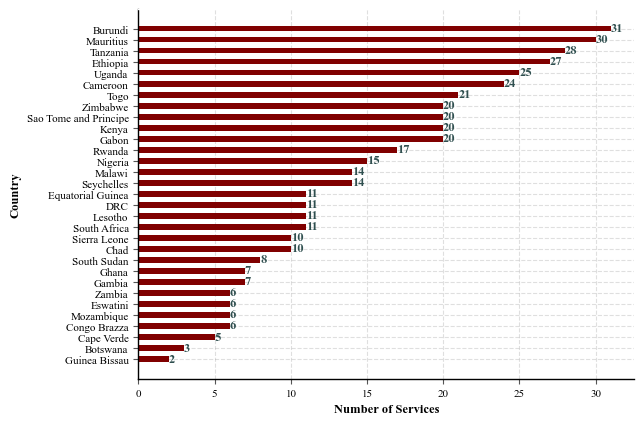

In [39]:
#Chart Preparation
# Specifying the colors
colors = ['maroon', 'maroon', 'maroon', 'maroon', 'maroon', 'maroon', 'maroon', 'maroon', 'maroon',
          'maroon', 'maroon', 'maroon', 'maroon', 'maroon', 'maroon' ]

# Creating lists of the columns used for plotting (Countries and No of services)
countries = service_country_count.index
no_services = service_country_count['Number of Services'].tolist()

# Plotting + formatting the overall plot
# Outer color
plt.figure(facecolor='white')

# for inner formatting
ax = plt.axes()
# inner color
ax.set_facecolor("white")
# Grid formatting
ax.yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.25)
ax.xaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.25)
#ax.axhline(3, color='grey', alpha=0.5)  # median horizontal position
#ax.axvline(3, color='grey', alpha=0.5)  # median vertical position 
#ax2 = ax1.twinx() # Create a twin Axes sharing the xaxis.
#ax.tick_params(axis='x', colors='red') # Color the x axis ticks
#ax.tick_params(axis='y', colors='red') # Color the y axis ticks
ax.spines['bottom'].set_color('black') # Color the bottom axis lines
ax.spines['left'].set_color('black') # Color the left axis lines
#widths = [0.5, 0.3, 1.2,0.5, 0.3, 1.2,1] width=widths,
# labels = [" ", "  2", "  3"] # Have different labels for the ticks

plt.barh(countries, no_services, color=colors, height=.5, alpha=1, align = "center")

# add value labels
for i in range(len(countries)):
    plt.text(no_services[i], i, str(no_services[i]), ha='left', va='center', weight='bold', fontsize = 9, color = 'darkslategrey', font='Times New Roman')


plt.ylabel('Country', weight='bold', fontsize = 9, color = 'black', font='Times New Roman') # add to x-label to the plot
plt.xlabel('Number of Services', weight='bold', fontsize = 9, color = 'black', font='Times New Roman') # add y-label to the plot
#plt.title('Number of Postal Services per Country', fontweight='bold', fontsize = 12, color = 'black', font='Cambria') # add title to the plot
plt.xticks(rotation=0, fontsize=8, fontweight='normal', fontname='Times New Roman', color='black')
plt.yticks(rotation=0, fontsize=8, fontweight='normal', fontname='Times New Roman', color='black')
plt.show()


>Figure 2: Number of Postal Services per Category (Pie Chart)

In [40]:
# Data Preparation
cat_data = africa_data[['Cat', 'Serv_Name']]
cat_data.rename(columns = {'Serv_Name':'Number of Services'}, inplace = True)

cat_data = cat_data.groupby('Cat', axis=0).count()
cat_data.rename(index={1:'Postal Services', 2:'Health, Safety and Wellbeing', 3:'Education and Employment',
                   4:'Community Cohesion, Development and Poverty', 5:'Waste and Recycling',
                   6:'Data Collection and Provision', 7:'Access to Government Services',
                   8:'Energy and Utilities', 9:'Technology', 10:'Other'}, inplace=True)
cat_data

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7908\3799950850.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data.rename(columns = {'Serv_Name':'Number of Services'}, inplace = True)


,Number of Services
Cat,
Postal Services,242
"Health, Safety and Wellbeing",23
Education and Employment,43
"Community Cohesion, Development and Poverty",33
Waste and Recycling,4
Data Collection and Provision,3
Access to Government Services,62
Energy and Utilities,11
Technology,11


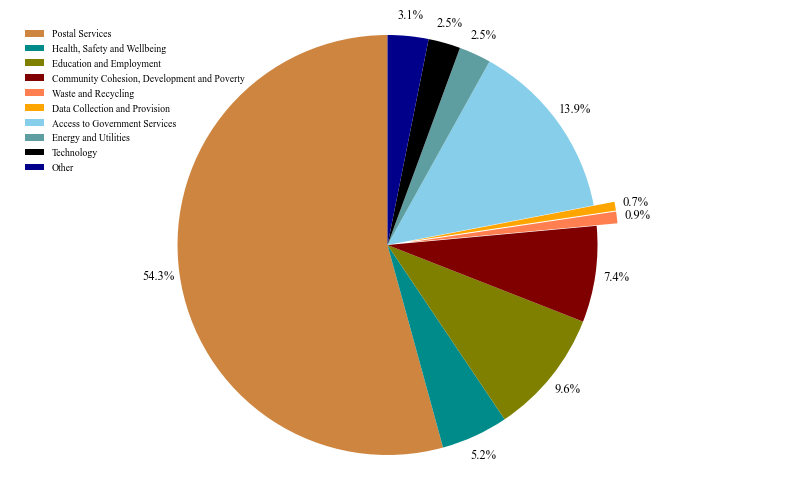

In [41]:
# Chart Preparation
# Formatting and Styling of the Pie Chart
colors_list = ['peru', 'darkcyan', 'olive', 'maroon', 'coral', 'orange', 'skyblue', 'cadetblue', 'black', 'darkblue']
explode_list = [0, 0, 0, 0, 0.1, 0.1, 0, 0, 0, 0.] # ratio for each value with which to offset each wedge.
text_font = {'family':'Times New Roman','color':'black','size':9, 'weight':'normal'}
title_font = {'family':'fantasy','color':'black','size':20, 'weight':'normal'}
legend_font = {'family':'Times New Roman','size':7, 'weight':'normal'}

# Plotting with styling the percent values.
cat_data['Number of Services'].plot(kind='pie',
                            figsize=(10, 6),
                            autopct='%1.1f%%',
                            startangle=90,    
                            shadow=False,
                            textprops=text_font,
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.10,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest number of services
                            )

# scale the title up by 12% to match pctdistance
#plt.title('Postal Services per Category', y=1.12, fontdict=title_font) 
plt.ylabel("") 
plt.axis('equal') 

# add legend
plt.legend(labels=cat_data.index, loc='upper left', prop=legend_font, frameon=False, ncol=1,
          fancybox=True, framealpha=1, shadow=True, borderpad=1) 

plt.show()

>Figure 3: Types of Customers of Postal Services (Pie Chart)

In [42]:
# Data Preparation
cust_data = africa_data[['Ben_Gov','Ben_Business', 'Ben_Citizen', 'Ben_Other']]
cust_type = cust_data.columns
 
cust_list = {'Customer Types': cust_type, 'Count': [cust_data['Ben_Gov'].sum(), cust_data['Ben_Business'].sum(), 
                                                     cust_data['Ben_Citizen'].sum(), cust_data['Ben_Other'].sum()]} 
cust_types = pd.DataFrame(cust_list)
cust_types.set_index('Customer Types', inplace=True)
cust_types.rename(index={'Ben_Gov':'Government', 'Ben_Business':'Business', 
                         'Ben_Citizen':'Citizen', 'Ben_Other':'Other'}, inplace=True)

cust_types

,Count
Customer Types,
Government,308.0
Business,324.0
Citizen,391.0
Other,56.0


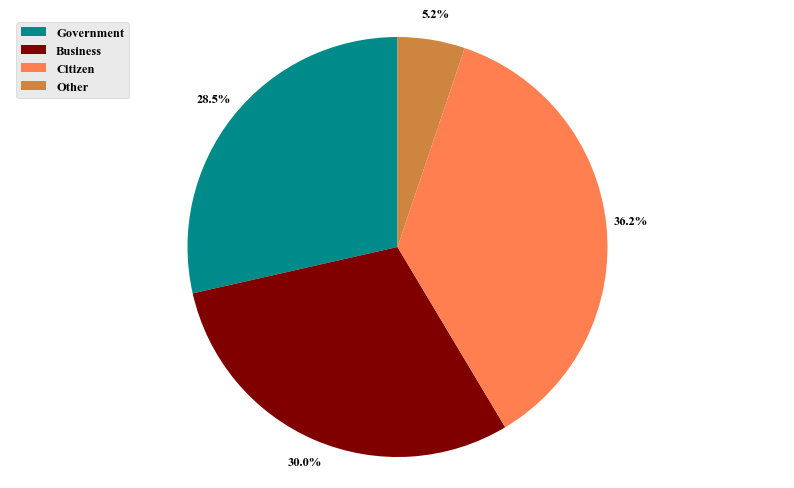

In [43]:
# Chart Preparation
# Formatting and Styling of the Pie Chart
colors_list = ['darkcyan', 'maroon', 'coral', 'peru']
explode_list = [0, 0, 0, 0] # ratio for each value with which to offset each wedge.
text_font = {'family':'Times New Roman','color':'black','size':9, 'weight':'bold'}
#title_font = {'family':'Times New Roman','color':'black','size':20, 'weight':'normal'}
legend_font = {'family':'Times New Roman','size':9, 'weight':'bold'}

cust_types['Count'].plot(kind='pie',
                            figsize=(10, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=False,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list, # 'explode' lowest type
                            textprops=text_font
                            )

# scale the title up by 12% to match pctdistance
#plt.title('Types of Customers of Postal Services', y=1.12, fontdict=title_font) 
plt.ylabel("") 

plt.axis('equal') 

plt.legend(labels=cust_types.index, loc='upper left', prop=legend_font) 

plt.show()

>Figure 4: Types of Customers of Postal Services Per Country (Stacked Bar chart)

In [44]:
# Data Preparation
cust_country = africa_data[['Country', 'Ben_Gov','Ben_Business', 'Ben_Citizen', 'Ben_Other']]
cust_country = cust_country.groupby('Country').agg({'Ben_Gov': 'sum', 'Ben_Business': 'sum', 'Ben_Citizen': 'sum', 'Ben_Other': 'sum'})
cust_country = pd.DataFrame(cust_country)
cust_country

,Ben_Gov,Ben_Business,Ben_Citizen,Ben_Other
Country,,,,
Botswana,1.0,1.0,3.0,3.0
Burundi,25.0,26.0,30.0,16.0
Cameroon,21.0,19.0,21.0,2.0
Cape Verde,1.0,2.0,1.0,0.0
Chad,7.0,10.0,10.0,0.0
Congo Brazza,3.0,4.0,6.0,0.0
DRC,11.0,11.0,11.0,11.0
Equatorial Guinea,10.0,9.0,10.0,0.0
Eswatini,1.0,2.0,5.0,1.0


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7908\4209007554.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels, rotation=0, fontsize=10, fontweight='normal',


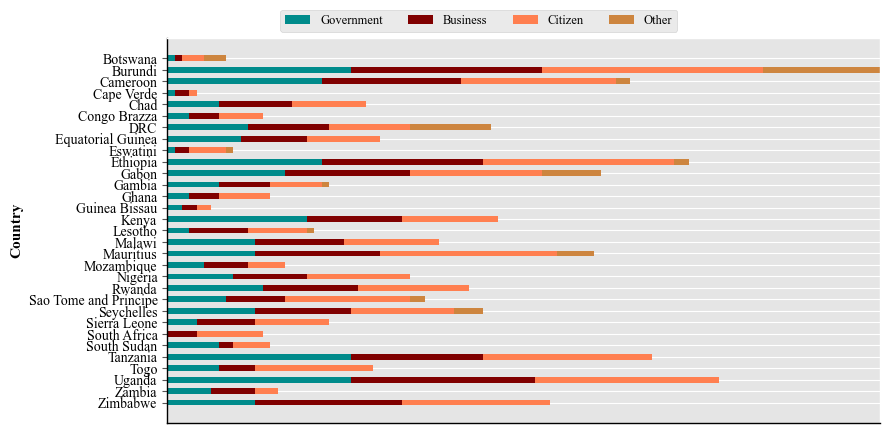

In [45]:
# Chart Preparation
cust_names = ['Government', 'Business', 'Citizen', 'Other']

# Initialize an empty dictionary
distribution = {}

# Iterate through the rows of the DataFrame cust_country 
# to set values of the dictionary distribution
for index, row in cust_country.iterrows():
    # Assuming 'Country' column as the key and rest of the row as the value
    key = cust_country.loc[index].name # Country 
    value = cust_country.loc[index].tolist() # values
    distribution[key] = value  # add a new item to the dictionary

# Formatting and Styling of the Pie Chart
colors_list = ['darkcyan', 'maroon', 'coral', 'peru']
text_font = {'family':'Times New Roman','color':'black','size':9, 'weight':'normal'}
#title_font = {'family':'fantasy','color':'black','size':20, 'weight':'normal'}
legend_font = {'family':'Times New Roman','size':9, 'weight':'normal'}

def draw(distribution, cust_names):
    """
   
    """
    labels = list(distribution.keys()) # Retrieve the Country as a list
    data = np.array(list(distribution.values())) # Retrieve the counter of a customer type as an array of lists
    data_cum = data.cumsum(axis=1)
    cust_colors = plt.colormaps['seismic'](
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    # Plotting + formatting the overall plot
    # Grid formatting
    
    #ax.yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.25)
    #ax.xaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.25)
    ax.spines['bottom'].set_color('black') # Color the bottom axis lines
    ax.spines['left'].set_color('black') # Color the left axis lines

    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(cust_names, colors_list)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)

        # Generate colors for the text inside the bars
        #r, g, b, _ = color
        #text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        # display and format label values in the bars
        #ax.bar_label(rects, label_type='center', font='Arial', color=text_color)
    
    ax.set_yticklabels(labels, rotation=0, fontsize=10, fontweight='normal', 
                  fontname='Times New Roman', color='black')
    #ax.set_xticklabels(data, rotation=0, fontsize=10, fontweight='normal', 
    #             fontname='Times New Roman', color='black')
    
    ax.set_xlabel('Number of Services', weight='bold', fontsize = 10, color = 'black', font='Times New Roman') # add to x-label to the plot)
    ax.set_ylabel('Country', weight='bold', fontsize = 11, color = 'black', font='Times New Roman') # add to y-label to the plot
    ax.legend(ncols=len(cust_names), bbox_to_anchor=(0.15, 1),
              loc='lower left', prop=legend_font)
    

    return fig, ax


draw(distribution, cust_names)
plt.show()

>Figure 5: Types of Channels of Postal Service (Pie Chart)

In [46]:
# Data Preparation
channel_data = africa_data[['Ch_Office','Ch_Website', 'Ch_Mobile', 'Ch_Other']]
channel_type = channel_data.columns
channel_list = {'Channel Types': channel_type, 'Count': [int(channel_data['Ch_Office'].sum()), channel_data['Ch_Website'].sum(), 
                                                     channel_data['Ch_Mobile'].sum(), channel_data['Ch_Other'].sum()]} 
channel_types = pd.DataFrame(channel_list)
channel_types.set_index('Channel Types', inplace=True)
channel_types.rename(index={'Ch_Office':'Post Office', 'Ch_Website':'Website', 
                            'Ch_Mobile':'Mobile App', 'Ch_Other':'Other'}, inplace=True)
channel_types


,Count
Channel Types,
Post Office,432.0
Website,56.0
Mobile App,63.0
Other,31.0


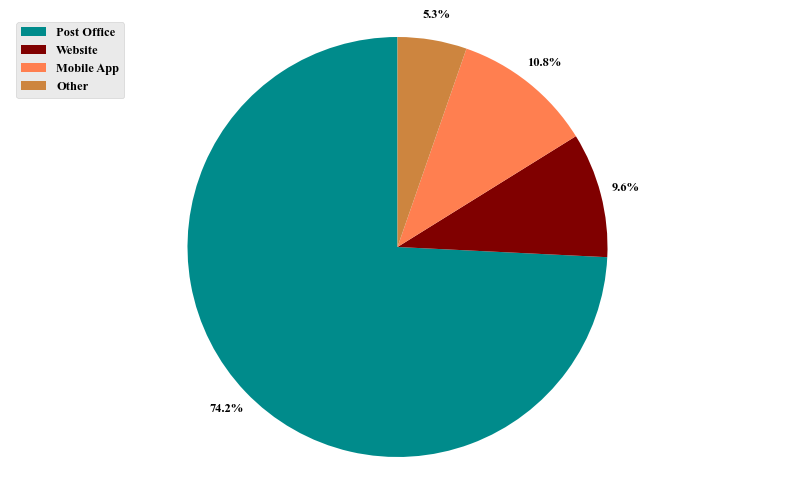

In [47]:
# Chart Preparation
# Formatting and Styling of the Pie Chart
colors_list = ['darkcyan', 'maroon', 'coral', 'peru']
explode_list = [0, 0, 0, 0] # ratio for each value with which to offset each wedge.
text_font = {'family':'Times New Roman','color':'black','size':9, 'weight':'bold'}
title_font = {'family':'Times New Roman','color':'black','size':20, 'weight':'normal'}
legend_font = {'family':'Times New Roman','size':9, 'weight':'bold'}

channel_types['Count'].plot(kind='pie',
                            figsize=(10, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=False,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list, # 'explode' the lowest channel type
                            textprops=text_font
                            )

# scale the title up by 12% to match pctdistance
#plt.title('Types of Channels of Postal Services', y=1.12,  fontdict=title_font) 
plt.ylabel("") 

plt.axis('equal') 

# add legend
plt.legend(labels=channel_types.index, loc='upper left', prop=legend_font) 

plt.show()

>Figure 6: Types of Postal Service Channels per Country (Stacked Bar Chart)

In [48]:
# Data Preparation
channels_country = africa_data[['Country', 'Ch_Office','Ch_Website', 'Ch_Mobile', 'Ch_Other']]
channels_country = channels_country.groupby('Country').agg({'Ch_Office': 'sum', 'Ch_Website': 'sum', 'Ch_Mobile': 'sum', 'Ch_Other': 'sum'})
channels_country = pd.DataFrame(channels_country)
channels_country

,Ch_Office,Ch_Website,Ch_Mobile,Ch_Other
Country,,,,
Botswana,3.0,0.0,0.0,0.0
Burundi,31.0,0.0,0.0,0.0
Cameroon,24.0,0.0,0.0,0.0
Cape Verde,2.0,0.0,0.0,0.0
Chad,10.0,0.0,0.0,0.0
Congo Brazza,5.0,5.0,6.0,0.0
DRC,11.0,0.0,0.0,1.0
Equatorial Guinea,11.0,0.0,0.0,0.0
Eswatini,5.0,0.0,1.0,0.0


In [49]:
channels_country.iloc[0].tolist()

[3.0, 0.0, 0.0, 0.0]

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7908\3960350087.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels, rotation=0, fontsize=10, fontweight='normal',
findfont: Font family 'Time New Roman' not found.
findfont: Font family 'Time New Roman' not found.
findfont: Font family 'Time New Roman' not found.
findfont: Font family 'Time New Roman' not found.
findfont: Font family 'Time New Roman' not found.


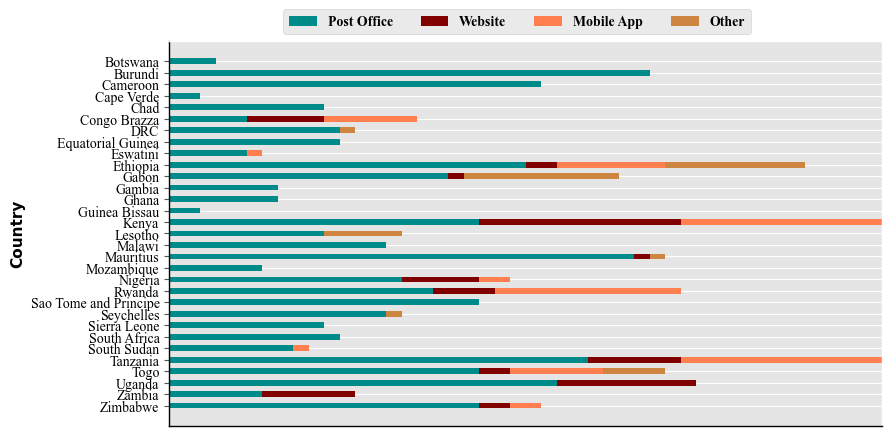

In [50]:
# Chart Preparation
channel_names = ['Post Office', 'Website', 'Mobile App', 'Other']

# Initialize an empty dictionary
distribution = {}

# Iterate through the rows of the DataFrame channels_country 
# to set values of dictionary distribution
for index, row in channels_country.iterrows():
    # Assuming 'Country' column as the key and rest of the row as the value
    key = channels_country.loc[index].name # Country
    value = channels_country.loc[index].tolist() # values
    distribution[key] = value  # add a new item to the dictionary

# Formatting and Styling of the Pie Chart
colors_list = ['darkcyan', 'maroon', 'coral', 'peru']
text_font = {'family':'Time New Roman','color':'black','size':10, 'weight':'bold'}
#title_font = {'family':'fantasy','color':'black','size':20, 'weight':'normal'}
legend_font = {'family':'Times New Roman','size':10, 'weight':'bold'}

def draw(distribution, channel_names):
    """
   
    """
    labels = list(distribution.keys()) # Retrieve the countries as a list
    data = np.array(list(distribution.values())) # Retrieve the counter of a channel type as an array of lists
    data_cum = data.cumsum(axis=1)
    channel_colors = plt.colormaps['seismic'](
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    # Plotting + formatting the overall plot
    # Grid formatting
    
    #ax.yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.25)
    #ax.xaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.25)
    ax.spines['bottom'].set_color('black') # Color the bottom axis lines
    ax.spines['left'].set_color('black') # Color the left axis lines
    
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(channel_names, colors_list)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)

        # Generate colors for the text inside the bars
        #r, g, b, _ = color
        #text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        # display and format label values in the bars
        #ax.bar_label(rects, label_type='center', font='Arial', color=text_color)
         
    ax.set_yticklabels(labels, rotation=0, fontsize=10, fontweight='normal', 
                  fontname='Times New Roman', color='black')
    #ax.set_xticklabels(data, rotation=0, fontsize=10, fontweight='normal', 
    #             fontname='Times New Roman', color='black')
    
    ax.set_xlabel('Number of Services', weight='bold', fontsize = 10, color = 'black', font='Time New Roman') # add to x-label to the plot)
    ax.set_ylabel('Country', weight='bold', fontsize = 11, color = 'black', font='Time New Roman') # add to y-label to the plot
    ax.legend(ncols=len(channel_names), bbox_to_anchor=(0.15, 1),
              loc='lower left', prop=legend_font)

    return fig, ax


draw(distribution, channel_names)
plt.show()

>Figure 7: Types of Fee Payers of Postal Services (Pie Chart)

In [51]:
# Data Preparation
fees_payer_data = africa_data[['Fees_Provider','Fees_Ben', 'Fees_Other']]
fees_payer_type = fees_payer_data.columns
fees_payer_list = {'Fees Payer Types': fees_payer_type, 
                   'Count': [int(fees_payer_data['Fees_Provider'].sum()), 
                            fees_payer_data['Fees_Ben'].sum(), 
                            fees_payer_data['Fees_Other'].sum()]} 
fees_payer_types = pd.DataFrame(fees_payer_list)
fees_payer_types.set_index('Fees Payer Types', inplace=True)
fees_payer_types.rename(index={'Fees_Provider':'Original Provider', 'Fees_Ben':'Benificiary', 
                            'Fees_Other':'Other'}, inplace=True)
fees_payer_types

,Count
Fees Payer Types,
Original Provider,143.0
Benificiary,336.0
Other,126.0


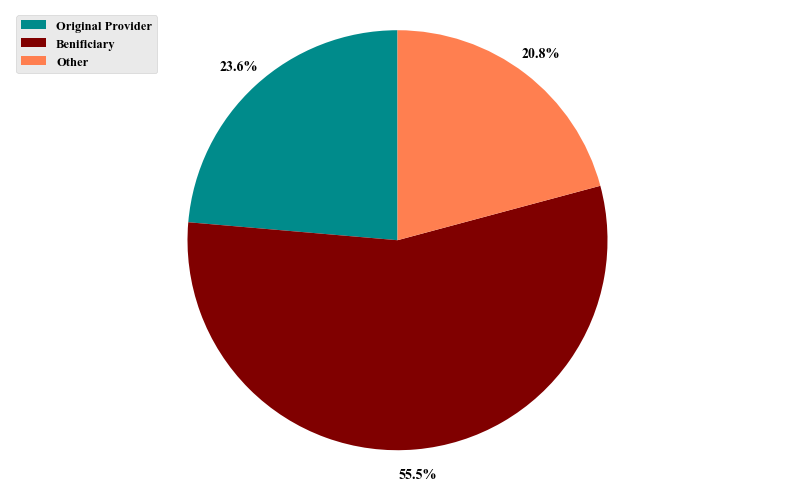

In [52]:
# Chart Preparation
# Formatting and Styling of the Pie Chart
colors_list = ['darkcyan', 'maroon', 'coral']
#explode_list = [0, 0, 0] # ratio for each value with which to offset each wedge.
text_font = {'family':'Times New Roman','color':'black','size':10, 'weight':'bold'}
title_font = {'family':'Times New Roman','color':'black','size':20, 'weight':'bold'}
legend_font = {'family':'Times New Roman','size':9, 'weight':'bold'}

fees_payer_types['Count'].plot(kind='pie',
                            figsize=(10, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=False,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            #explode=explode_list # 'explode' lowest 
                            textprops=text_font
                            )

# scale the title up by 12% to match pctdistance
#plt.title('Types of Fee Payers of Postal Services', y=1.12, fontdict=title_font) 
plt.ylabel("") 

plt.axis('equal') 

# add legend
plt.legend(labels=fees_payer_types.index, loc='upper left', prop=legend_font) 

plt.show()

>Figure 8: Types of Fee Payers of Postal Services per Country (Stacked Bar Chart)

In [53]:
# Data Preparation
fees_payer_country = africa_data[['Country', 'Fees_Provider','Fees_Ben', 'Fees_Other']]
fees_payer_country = fees_payer_country.groupby('Country').agg({'Fees_Provider': 'sum', 'Fees_Ben': 'sum', 'Fees_Other': 'sum'})
fees_payer_country

,Fees_Provider,Fees_Ben,Fees_Other
Country,,,
Botswana,1.0,3.0,1.0
Burundi,25.0,28.0,15.0
Cameroon,2.0,23.0,15.0
Cape Verde,1.0,1.0,0.0
Chad,0.0,10.0,0.0
Congo Brazza,2.0,6.0,4.0
DRC,10.0,10.0,11.0
Equatorial Guinea,0.0,11.0,0.0
Eswatini,2.0,4.0,0.0


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7908\77763964.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels, rotation=0, fontsize=10, fontweight='normal',


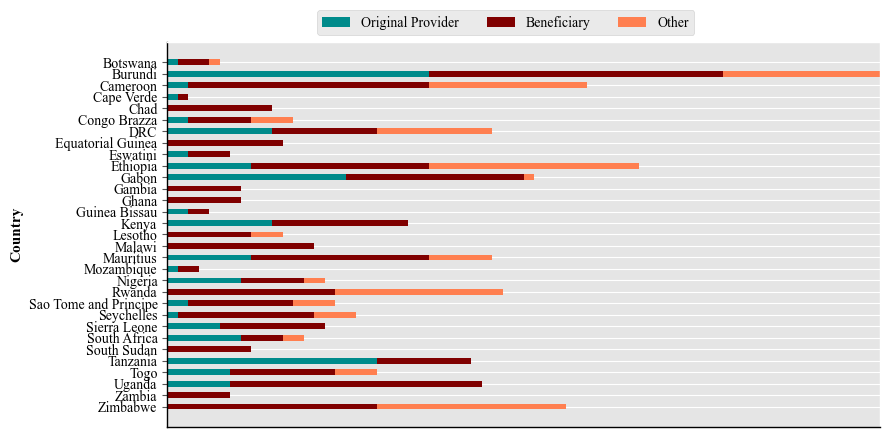

In [54]:
# Chart Preparation
payer_types = ['Original Provider', 'Beneficiary', 'Other']

# Initialize an empty dictionary
distribution = {}

# Formatting and Styling of the Pie Chart
colors_list = ['darkcyan', 'maroon', 'coral']
text_font = {'family':'Arial','color':'black','size':10, 'weight':'normal'}
#title_font = {'family':'fantasy','color':'black','size':20, 'weight':'normal'}
legend_font = {'family':'Times New Roman','size':10, 'weight':'normal'}

# Iterate through the rows of the DataFrame fees_payer_country 
# to set values of dictionary distribution
for index, row in fees_payer_country.iterrows():
    # Assuming 'Country' column as the key and rest of the row as the value
    key = fees_payer_country.loc[index].name # Country
    value = fees_payer_country.loc[index].tolist() # values
    distribution[key] = value # add a new item to the dictionary

    
def draw(distribution, payer_types):
    """
 
    """
    labels = list(distribution.keys()) # Retrieve the countries as a list
    data = np.array(list(distribution.values())) # Retrieve the counter of a channel type as an array of lists
    data_cum = data.cumsum(axis=1)
    payer_colors = plt.colormaps['PiYG'](
        np.linspace(0.15, 0.85, data.shape[1]))


    fig, ax = plt.subplots(figsize=(9.2, 5))
    
    # Plotting + formatting the overall plot
    # Grid formatting
    
    #ax.yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.25)
    #ax.xaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.25)
    ax.spines['bottom'].set_color('black') # Color the bottom axis lines
    ax.spines['left'].set_color('black') # Color the left axis lines
    
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())
 
 
    for i, (colname, color) in enumerate(zip(payer_types, colors_list)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)

        # Generate colors for the text inside the bars
        #r, g, b, _ = color
        #text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        # display and format label values in the bars
        #ax.bar_label(rects, label_type='center',  font='Arial', color=text_color)

    ax.set_yticklabels(labels, rotation=0, fontsize=10, fontweight='normal', 
                  fontname='Times New Roman', color='black')
        #ax.set_xticklabels(data, rotation=0, fontsize=10, fontweight='normal', 
    #             fontname='Times New Roman', color='black')
    
    ax.set_xlabel('Number of Services', weight='bold', fontsize = 10, color = 'black', font='Cambria') # add to x-label to the plot)
    ax.set_ylabel('Country', weight='bold', fontsize = 11, color = 'black', font='Times New Roman') # add to y-label to the plot
    ax.legend(ncols=len(channel_names), bbox_to_anchor=(0.2, 1),
              loc='lower left', prop=legend_font)

    return fig, ax


draw(distribution, payer_types)
plt.show()

>Table 3: Number of Postal Services per Category per Sub-category (Table)

In [55]:
#Data Preparation
cat_data = africa_data[['Cat','Sub_Cat', 'Serv_Name']]
cat_data = cat_data.groupby(['Cat', 'Sub_Cat']).agg({'Sub_Cat': 'count'})
# Saving the table in an excel sheet
with pd.ExcelWriter('PhaseITables.xlsx', mode='a') as writer:
    cat_data.to_excel(writer, sheet_name='Services-Cat-Sub')  

cat_data

Sub_Cat
Cat  Sub_Cat         
1.0  1.10          48
     1.11          17
     1.12           9
     1.13          17
     1.14          14
     1.20           5
     1.30          22
     1.40          21
     1.50          11
     1.60          18
     1.70          24
     1.80          15
     1.90          21
2.0  2.10          12
     2.30           1
     2.70           3
     2.80           7
3.0  3.10           7
     3.20          12
     3.30           9
     3.40           3
     3.60           2
     3.70          10
4.0  4.10           7
     4.20          15
     4.30           1
     4.40           2
     4.50           5
     4.70           1
     4.80           2
5.0  5.10           1
     5.20           3
6.0  6.10           2
     6.20           1
7.0  7.10          13
     7.20           7
     7.30           6
     7.40          11
     7.50           4
     7.60           5
     7.70           8
     7.80           8
8.0  8.10           9
     8.20           2
9.0  9.10          11
10.0 10.00         14

>Table 2: Number of Services per Country per Category (Table)

In [56]:
# Data Preparation
country_cat_data = africa_data[['Country','Cat']]
 
country_cat_data = country_cat_data.groupby(['Country', 'Cat']).agg({'Cat': 'count'})
country_cat_data.rename(columns = {'Cat':'Count'}, inplace = True)

country_data_pivot = country_cat_data.unstack()
country_data_pivot.fillna(0, inplace=True)

# Saving the table into an excel sheet
with pd.ExcelWriter('PhaseITables.xlsx', mode='a') as writer:  
    country_data_pivot.to_excel(writer, sheet_name='country_data_pivot')  

country_data_pivot

Count                                              
Cat                    1.0  2.0  3.0  4.0  5.0  6.0  7.0  8.0  9.0   10.0
Country                                                                  
Botswana                3.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0
Burundi                12.0  0.0  4.0  0.0  0.0  0.0  5.0  0.0  0.0  10.0
Cameroon               11.0  0.0  4.0  1.0  0.0  0.0  4.0  0.0  0.0   4.0
Cape Verde              1.0  1.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0   0.0
Chad                    5.0  0.0  3.0  0.0  0.0  0.0  2.0  0.0  0.0   0.0
Congo Brazza            1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  1.0   0.0
DRC                    11.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0
Equatorial Guinea       9.0  0.0  0.0  0.0  0.0  0.0  2.0  0.0  0.0   0.0
Eswatini                1.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0   0.0
Ethiopia               11.0  1.0  6.0  4.0  0.0  0.0  3.0  1.0  1.0   0.0
Gabon                  13.0  0.0  1.0  2.0  0.0  0.0  3.0  0.0  1.0   0.0
Gambia                  7.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0
Ghana                   7.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0
Guinea Bissau           2.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0
Kenya                  13.0  1.0  3.0  0.0  0.0  0.0  3.0  0.0  0.0   0.0
Lesotho                 7.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  1.0   0.0
Malawi                  9.0  1.0  1.0  2.0  0.0  0.0  0.0  1.0  0.0   0.0
Mauritius              11.0  2.0  3.0  4.0  2.0  0.0  6.0  1.0  1.0   0.0
Mozambique              3.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0   0.0
Nigeria                11.0  2.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0   0.0
Rwanda                 10.0  1.0  0.0  1.0  0.0  0.0  3.0  1.0  1.0   0.0
Sao Tome and Principe  13.0  1.0  1.0  2.0  1.0  0.0  2.0  0.0  0.0   0.0
Seychelles             12.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   0.0
Sierra Leone           10.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0
South Africa            7.0  1.0  0.0  0.0  0.0  0.0  3.0  0.0  0.0   0.0
South Sudan             1.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   0.0
Tanzania               12.0  2.0  5.0  3.0  0.0  0.0  4.0  1.0  1.0   0.0
Togo                    5.0  3.0  3.0  1.0  0.0  0.0  8.0  1.0  0.0   0.0
Uganda                  9.0  3.0  3.0  3.0  0.0  1.0  4.0  1.0  1.0   0.0
Zambia                  2.0  0.0  0.0  1.0  0.0  0.0  3.0  0.0  0.0   0.0
Zimbabwe               13.0  1.0  1.0  1.0  0.0  1.0  2.0  0.0  1.0   0.0

>Figure new: Types of Beneficaries of Postal Services per Country (Stacked Bar Chart)

In [57]:
africa_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 446 entries, 0 to 446
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country        446 non-null    object 
 1   Serv_Name      446 non-null    object 
 2   Cat            446 non-null    float64
 3   Sub_Cat        446 non-null    float64
 4   Ben_Gov        446 non-null    float64
 5   Ben_Business   446 non-null    float64
 6   Ben_Citizen    446 non-null    float64
 7   Ben_Other      446 non-null    float64
 8   Ben_Specify    446 non-null    object 
 9   Ch_Office      446 non-null    float64
 10  Ch_Website     446 non-null    float64
 11  Ch_Mobile      446 non-null    float64
 12  Ch_Other       446 non-null    float64
 13  Ch_Specify     446 non-null    object 
 14  Fees_Provider  446 non-null    float64
 15  Fees_Ben       446 non-null    float64
 16  Fees_Other     446 non-null    float64
 17  Fees_Specify   446 non-null    object 
dtypes: float64(13),

In [58]:
# Data Preparation
beneficiary_country = africa_data[['Country', 'Ben_Gov','Ben_Business', 'Ben_Citizen', 'Ben_Other']]
beneficiary_country = beneficiary_country.groupby('Country').agg({'Ben_Gov': 'sum', 'Ben_Business': 'sum', 'Ben_Citizen': 'sum', 'Ben_Other': 'sum'})
beneficiary_country

,Ben_Gov,Ben_Business,Ben_Citizen,Ben_Other
Country,,,,
Botswana,1.0,1.0,3.0,3.0
Burundi,25.0,26.0,30.0,16.0
Cameroon,21.0,19.0,21.0,2.0
Cape Verde,1.0,2.0,1.0,0.0
Chad,7.0,10.0,10.0,0.0
Congo Brazza,3.0,4.0,6.0,0.0
DRC,11.0,11.0,11.0,11.0
Equatorial Guinea,10.0,9.0,10.0,0.0
Eswatini,1.0,2.0,5.0,1.0


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7908\2787989349.py:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels, rotation=0, fontsize=10, fontweight='normal',


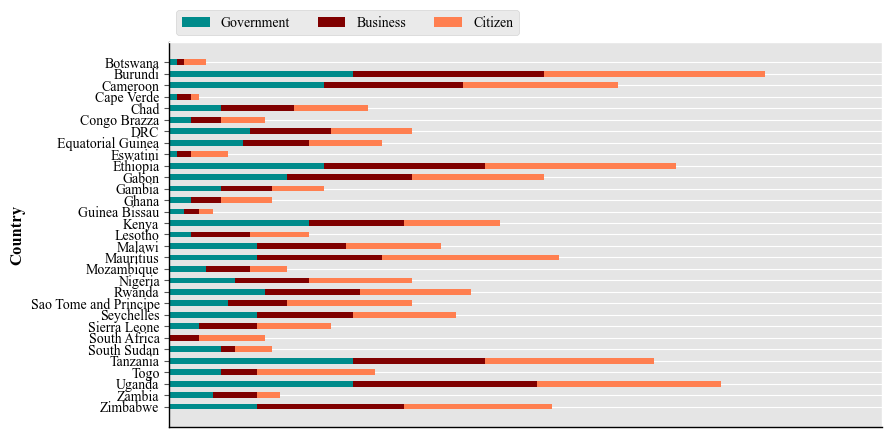

In [59]:
# Chart Preparation
beneficiary_types = ['Government', 'Business', 'Citizen', 'Others']

# Initialize an empty dictionary
distribution = {}

# Formatting and Styling of the  Chart
colors_list = ['darkcyan', 'maroon', 'coral']
text_font = {'family':'Times New Roman','color':'black','size':10, 'weight':'normal'}
#title_font = {'family':'fantasy','color':'black','size':20, 'weight':'normal'}
legend_font = {'family':'Times New Roman','size':10, 'weight':'normal'}
   
# Iterate through the rows of the DataFrame beneficiary_country 
# to set values of the dictionary distribution
for index, row in beneficiary_country.iterrows():
    # Assuming 'Country' column as the key and rest of the row as the value
    key = beneficiary_country.loc[index].name # Country
    value = beneficiary_country.loc[index].tolist() # values
    distribution[key] = value # add a new item to the dictionary

    
def survey(distribution, beneficiary_types):
    """

    """ 
    labels = list(distribution.keys()) # Retrieve the countries as a list
    data = np.array(list(distribution.values())) # Retrieve the counter of a channel type as an array of lists
    data_cum = data.cumsum(axis=1)
    channel_colors = plt.colormaps['RdYlGn'](
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    # Plotting + formatting the overall plot
    # Grid formatting
    
    #ax.yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.25)
    #ax.xaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.25)
    ax.spines['bottom'].set_color('black') # Color the bottom axis lines
    ax.spines['left'].set_color('black') # Color the left axis lines
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(beneficiary_types, colors_list)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)


        # Generate colors for the text inside the bars
        #r, g, b, _ = color
        #text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        # display and format label values in the bars
        #ax.bar_label(rects, label_type='center',  font='Arial', color=text_color)
        
    ax.set_yticklabels(labels, rotation=0, fontsize=10, fontweight='normal', 
                  fontname='Times New Roman', color='black')
        #ax.set_xticklabels(data, rotation=0, fontsize=10, fontweight='normal', 
    #             fontname='Times New Roman', color='black')
    
    ax.set_xlabel('Number of Services', weight='bold', fontsize = 10, color = 'black', font='Times New Roman') # add to x-label to the plot)
    ax.set_ylabel('Country', weight='bold', fontsize = 12, color = 'black', font='Times New Roman') # add to y-label to the plot
    ax.legend(ncols=len(beneficiary_types), bbox_to_anchor=(0, 1),
              loc='lower left', prop=legend_font)

    return fig, ax


survey(distribution, beneficiary_types)
plt.show()

>> End of Project